## Дополнительное задание по практической работе №7
## Распознование символов
## Я решила не создавать подобие рисунков самостоятельно, а воспользоваться уже существующими датасетами, из подходящих на эту роль я выбрала датасет рукописных цифр mnist

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

%matplotlib inline

### Скачиваем датасет и посмотрим на то, что он из себя представляет

Размер обучающей выборки (60000, 28, 28)
Размер тестовой выборки (10000, 28, 28)


Text(0.5, 1.0, 'Цифра 5')

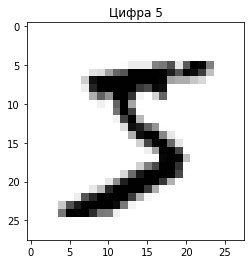

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')

plt.imshow(X_train[0, :, :], cmap='binary')
plt.title(f'Цифра {y_train[0]}')

In [4]:
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Каждый элемент датасета является матрицей размером 28x28 пикселей, где каждый пиксель является целым числом от 0 до 255 (где 0 это белый цвет, а 255 это черный)
### Что бы нейронной сети было проще обучаться, входные данные лучше преобразовывать в значения от 0 до 1, поэтому мы разделим каждый пиксель на 255
### Также воспользуемся функцией to_categorical для преобразования целых чисел в выходных данных в категориальные, как мы делали это в основном задании этой практической работы

In [19]:
X_train = X_train / 255
X_test = X_test / 255

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print('Вот, как теперь выглядят наши выходные данные')
print(f'Было ({y_train[0]}) -> стало ({y_train_cat[0]})')

Вот, как теперь выглядят наши выходные данные
Было (5) -> стало ([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.])


### Создаем модель, первым слоем будет Flatten для того, что бы развернуть нашу матрицу в вектор, потом используем два слоя Dense со 128 нейронами, потом слой Dense с 64 нейронами и, наконец, выходной слой Dense с 10 нейронами и функцией активации softmax

In [14]:
model = keras.Sequential()
model.add( Flatten(input_shape=(28, 28)) )
model.add( Dense(128, activation='relu') )
model.add( Dense(128, activation='relu') )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax') )

### Скомпилируем модель, используем оптимизатор rmsprop, функцию потерь categorical_crossentropy и метрику качества accuracy

In [30]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

### Обучение будем проводить в 10 эпох (10 раз пробежимся по всем данным) с использование батчей размером в 32 наблюдения, также используем валидацию, что бы бороться с переобучением
### Батчи это небольшой набор наблюдений, они используются для ускорения обучения нейросети, при указании батчей сеть будет корректировать свои веса только после прохождения всего батча, а не после каждого элемента

In [34]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9931 - val_loss: 0.1989 - val_accuracy: 0.9766
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0273 - accuracy: 0.9937 - val_loss: 0.2116 - val_accuracy: 0.9752
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9940 - val_loss: 0.2160 - val_accuracy: 0.9764
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0258 - accuracy: 0.9944 - val_loss: 0.2716 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9945 - val_loss: 0.2636 - val_accuracy: 0.9762
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9948 - val_loss: 0.2440 - val_accuracy: 0.9779
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9954 - val_loss: 0.2570 - val_accuracy:

In [35]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.9758


[0.31624436378479004, 0.9757999777793884]

### Как видим из проверки сети, она научилась довольно не плохо распознавать цифры (97% правильно распознанных цифр)
### Построим графики для функции потерь и метрики качества во время всего обучения

In [47]:
hist = history.history
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1500}

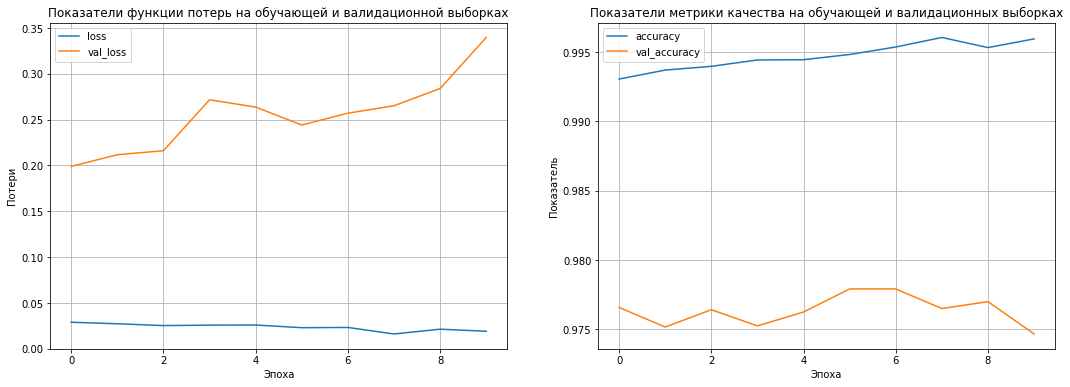

In [69]:
plt.figure(figsize=(18, 6))

plt.subplot(121)

plt.plot(history.epoch, hist['loss'])
plt.plot(history.epoch, hist['val_loss'])

plt.title('Показатели функции потерь на обучающей и валидационной выборках')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(['loss', 'val_loss'])
plt.grid(True)

plt.subplot(122)

plt.plot(history.epoch, hist['accuracy'])
plt.plot(history.epoch, hist['val_accuracy'])

plt.title('Показатели метрики качества на обучающей и валидационных выборках')
plt.xlabel('Эпоха')
plt.ylabel('Показатель')
plt.legend(['accuracy', 'val_accuracy'])
plt.grid(True)

### Из первого графика видно, что почти с каждой эпохой модель все больше ошибалась на валидационной выборке, это эффект переобучения
### На правом графике видно, что модель распозновала 99% всех элементов в обучающей выборке, но только 97% в валидационной, в идеале нужно сделать так, что бы графики обучающей и валидационной выборок находились на одном уровне